For the 1th step 

Action: 2
Reward: -1
Done: False


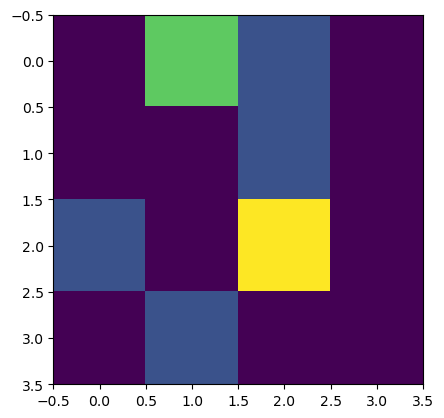

For the 2th step 

Action: 3
Reward: -1
Done: False


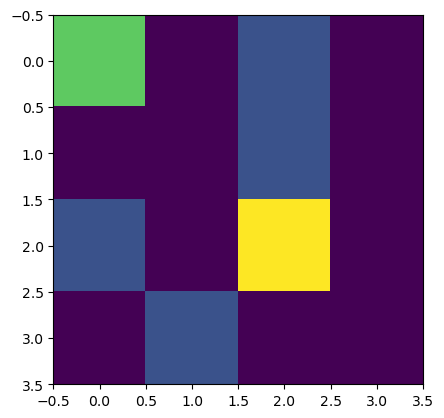

For the 3th step 

Action: 1
Reward: -1
Done: False


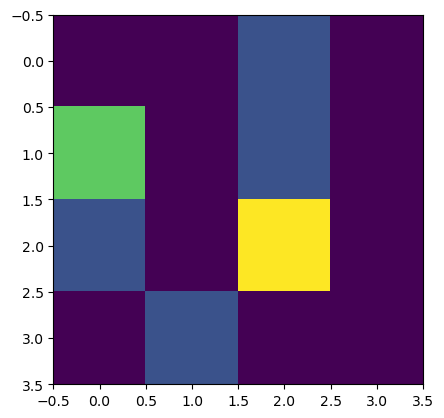

For the 4th step 

Action: 3
Reward: -1
Done: False


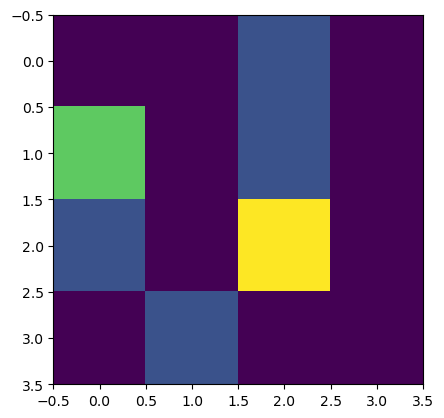

For the 5th step 

Action: 3
Reward: -1
Done: False


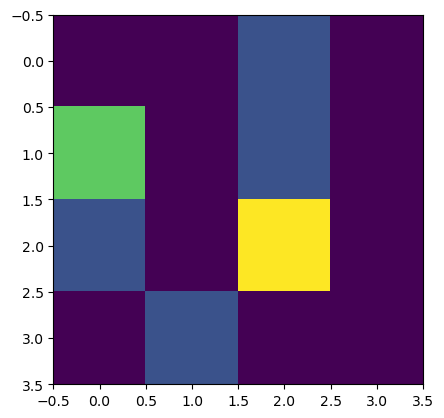

For the 6th step 

Action: 0
Reward: -1
Done: False


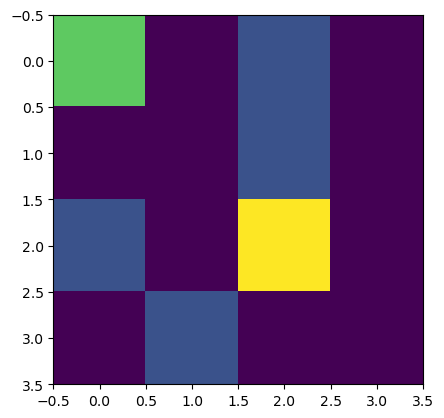

For the 7th step 

Action: 2
Reward: -1
Done: False


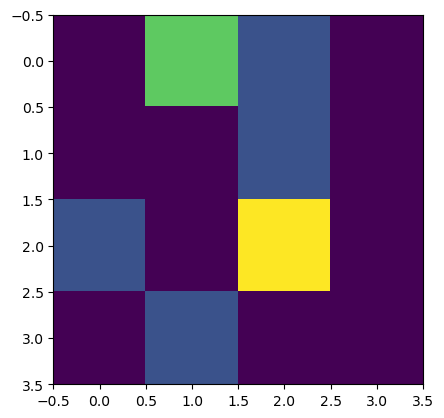

For the 8th step 

Action: 2
Reward: -1
Done: False


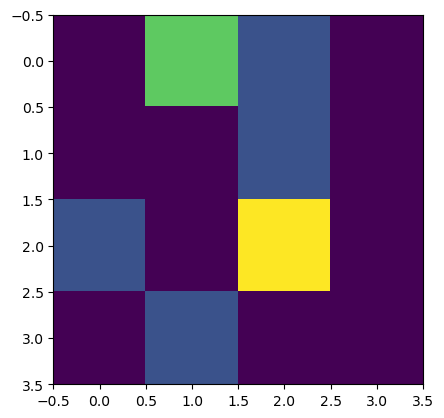

For the 9th step 

Action: 2
Reward: -1
Done: False


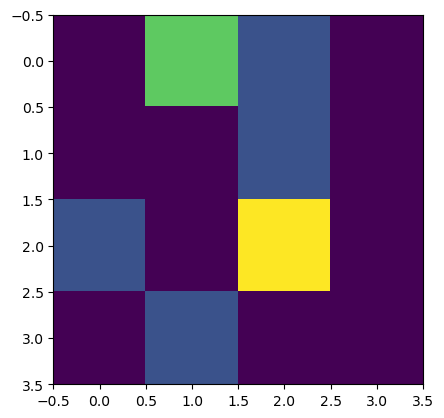

For the 10th step 

Action: 2
Reward: -1
Done: False


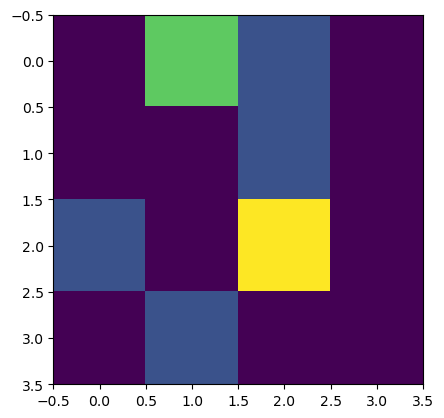

For the 11th step 

Action: 0
Reward: -1
Done: False


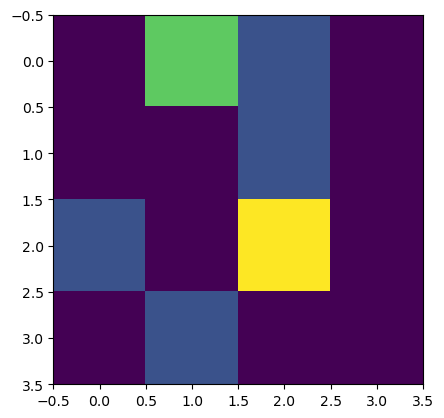

For the 12th step 

Action: 0
Reward: -1
Done: False


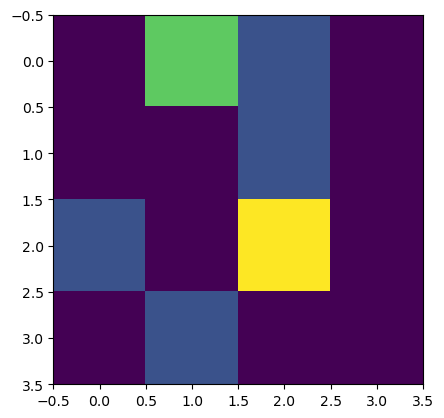

For the 13th step 

Action: 0
Reward: -1
Done: False


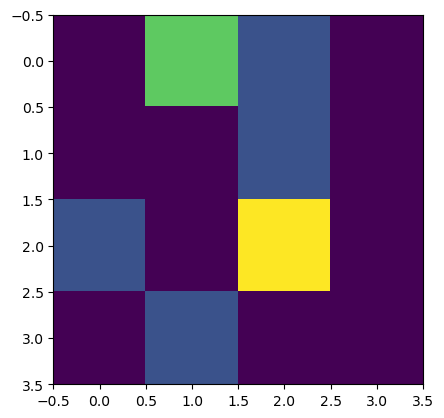

For the 14th step 

Action: 3
Reward: -1
Done: False


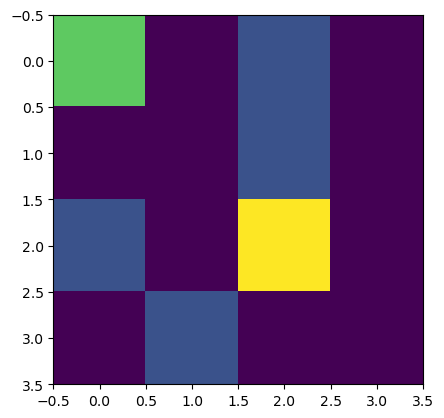

For the 15th step 

Action: 0
Reward: -1
Done: False


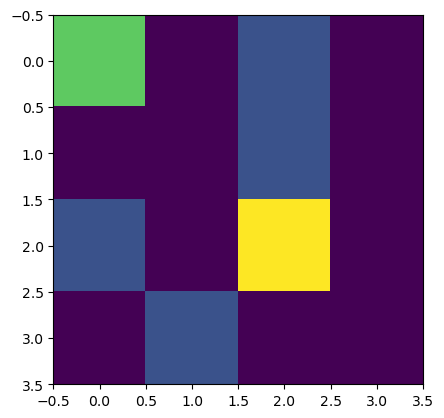

For the 16th step 

Action: 2
Reward: -1
Done: False


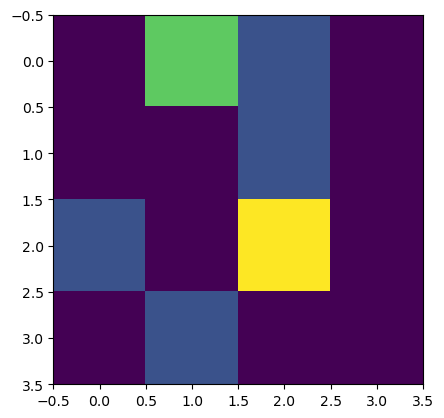

For the 17th step 

Action: 3
Reward: -1
Done: False


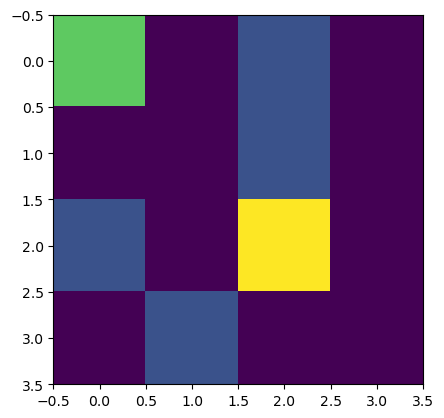

For the 18th step 

Action: 2
Reward: -1
Done: False


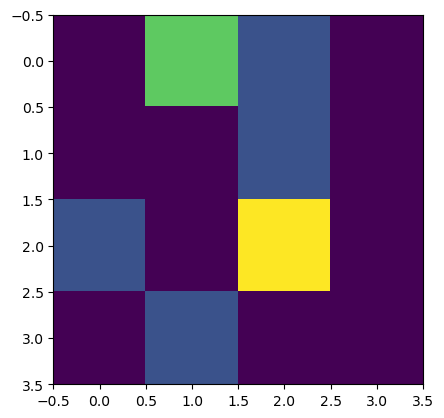

For the 19th step 

Action: 3
Reward: -1
Done: False


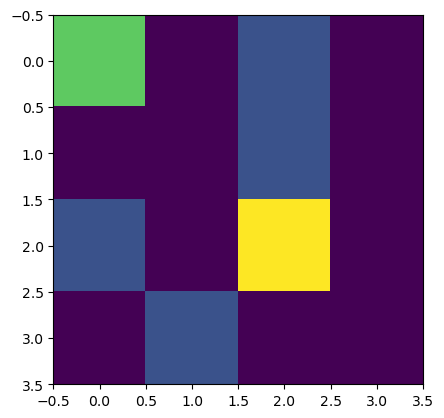

In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

class TreasureHuntEnv():
    def __init__(self):
        self.action_space = np.array([0, 1, 2, 3])
        self.observation_space = np.array([(i, j) for i in range(4) for j in range(4)])
        self.state = (0, 0)  # starting state
        self.treasure = (2, 2)  # treasure location
        self.obstacle = [(0, 2), (1, 2), (2, 0), (3, 1)]  # obstacle location
        self.reward = {self.treasure: 10, (0, 2): -5, (1, 2): -5, (2, 0): -5, (3, 1): -5}

        for i in range(4):
            for j in range(4):
                if (i, j) not in self.reward.keys():
                    self.reward[(i, j)] = -1


    def step(self, action):
        reward = self.reward.get(self.state, 0)
        if self.state == self.treasure:
            done = True
        else:
            done = False
        if action == 0:
            next_state = (self.state[0] - 1, self.state[1])
        elif action == 1:
            next_state = (self.state[0] + 1, self.state[1])
        elif action == 2:
            next_state = (self.state[0], self.state[1] + 1)
        elif action == 3:
            next_state = (self.state[0], self.state[1] - 1)
        else:
            raise ValueError("Invalid action")
        if (next_state[0] >= 0 and next_state[0] < 4 and 
            next_state[1] >= 0 and next_state[1] < 4):
            if next_state not in self.obstacle:
                self.state = next_state
        return np.array(self.state), reward, done, {}


    def reset(self):
        self.state = (0, 0)
        return np.array(self.state)

    def render(self):
        grid = np.full((4, 4), -2)

        # mark the current position of the agent
        grid[self.state] = 1
        # mark the treasure location
        grid[self.treasure] = 2
        # mark the obstacle locations
        for obs in self.obstacle:
            grid[obs] = -1
        # plot the grid
        plt.imshow(grid)
        plt.show()

import numpy as np
import random

class RandomAgent():
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return random.choice(self.action_space)

    def reset(self):
        pass

env = TreasureHuntEnv()
agent = RandomAgent(env.action_space)

obs = env.reset()
done = False
reward = 0  # initialize reward to 0
count = 1
while not done:
    action = agent.act(obs, reward, done)
    obs, reward, done, _ = env.step(action)
    print(f"For the {count}th step \n")
    count += 1
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
    env.render()
    if count == 20:
        break



In this report, we describe the environment designed for Part I of the project. The environment is called "TreasureHuntEnv" and is based on a grid-world. The environment consists of a 4x4 grid, in which the agent navigates to find a treasure located at (2, 2) while avoiding obstacles located at (0, 2), (1, 2), (2, 0), and (3, 1). The agent can take four discrete actions: move up, move down, move right, and move left. The state of the environment is represented by the current position of the agent on the grid. The reward structure is as follows: reaching the treasure yields a reward of 10, while encountering an obstacle incurs a penalty of -5. All other actions yield a reward of 0. The main objective of the agent is to maximize the cumulative reward while navigating to the treasure location.

To visualize the environment, we plotted the grid-world using the matplotlib library in Python. The plot shows the current position of the agent, the location of the treasure, and the positions of the obstacles.

In terms of safety, we have ensured that the agent takes only valid actions that are allowed by the environment. Specifically, we have defined the action space of the agent as a set of four discrete actions that correspond to moving in the four cardinal directions. Additionally, we have defined the state space of the environment as a set of all valid positions on the grid. We have also checked for collisions with obstacles and restricted the agent's movement accordingly. By enforcing these constraints, we ensure that the agent navigates within the defined state space and takes only valid actions that do not violate the constraints of the environment.In this report, we describe the environment designed for Part I of the project. The environment is called "TreasureHuntEnv" and is based on a grid-world. The environment consists of a 4x4 grid, in which the agent navigates to find a treasure located at (2, 2) while avoiding obstacles located at (0, 2), (1, 2), (2, 0), and (3, 1). The agent can take four discrete actions: move up, move down, move right, and move left. The state of the environment is represented by the current position of the agent on the grid. The reward structure is as follows: reaching the treasure yields a reward of 10, while encountering an obstacle incurs a penalty of -5. All other actions yield a reward of 0. The main objective of the agent is to maximize the cumulative reward while navigating to the treasure location.

To visualize the environment, we plotted the grid-world using the matplotlib library in Python. The plot shows the current position of the agent, the location of the treasure, and the positions of the obstacles.

In terms of safety, we have ensured that the agent takes only valid actions that are allowed by the environment. Specifically, we have defined the action space of the agent as a set of four discrete actions that correspond to moving in the four cardinal directions. Additionally, we have defined the state space of the environment as a set of all valid positions on the grid. We have also checked for collisions with obstacles and restricted the agent's movement accordingly. By enforcing these constraints, we ensure that the agent navigates within the defined state space and takes only valid actions that do not violate the constraints of the environment.

# Part II

For the 1th step
Action: 1
Reward: -1
Done: False


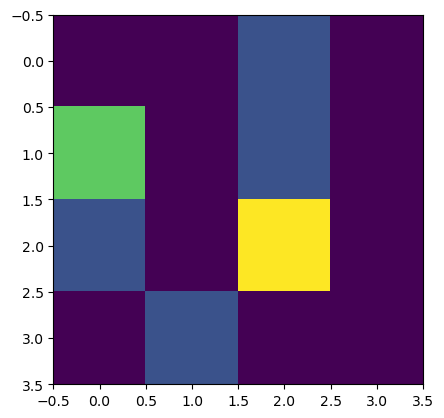

For the 2th step
Action: 1
Reward: -1
Done: False


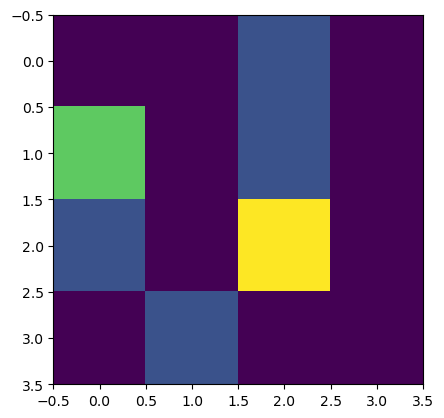

For the 3th step
Action: 3
Reward: -1
Done: False


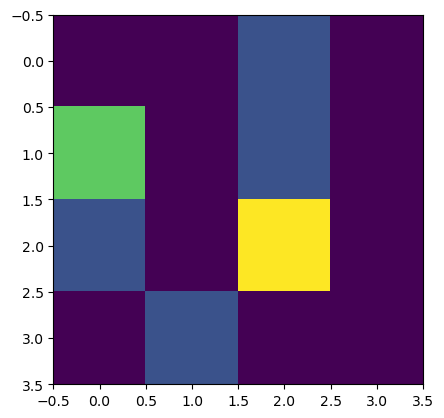

For the 4th step
Action: 0
Reward: -1
Done: False


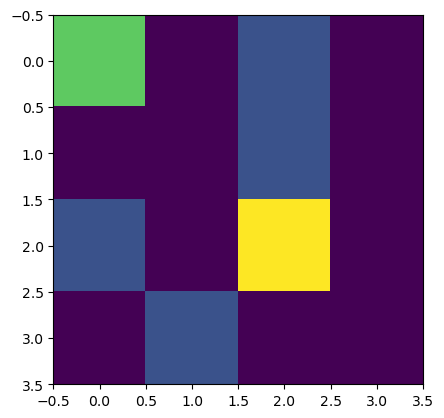

For the 5th step
Action: 0
Reward: -1
Done: False


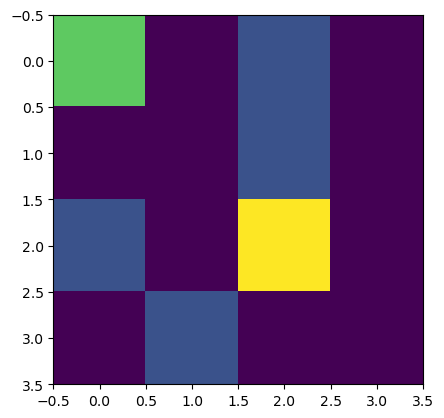

For the 6th step
Action: 2
Reward: -1
Done: False


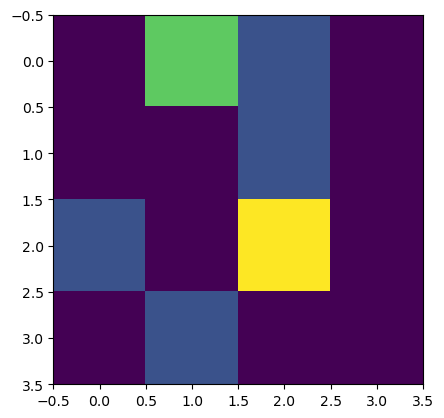

For the 7th step
Action: 3
Reward: -1
Done: False


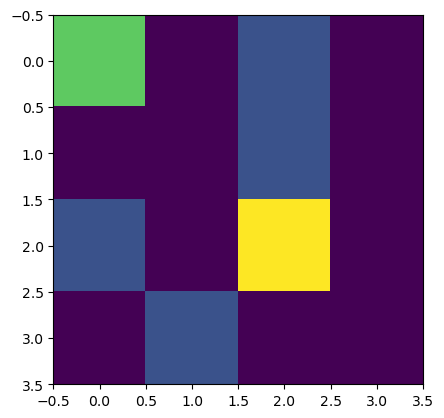

For the 8th step
Action: 3
Reward: -1
Done: False


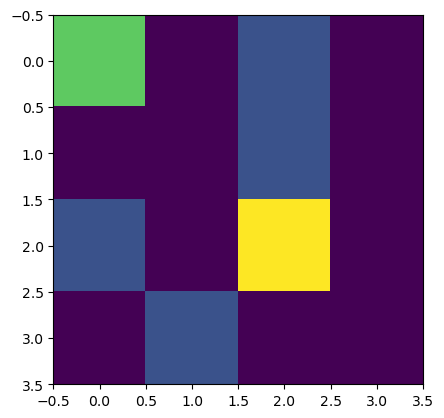

For the 9th step
Action: 1
Reward: -1
Done: False


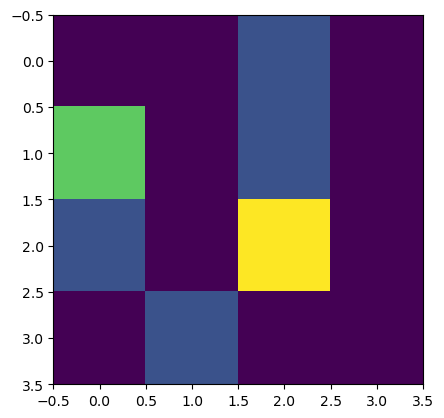

For the 10th step
Action: 2
Reward: -1
Done: False


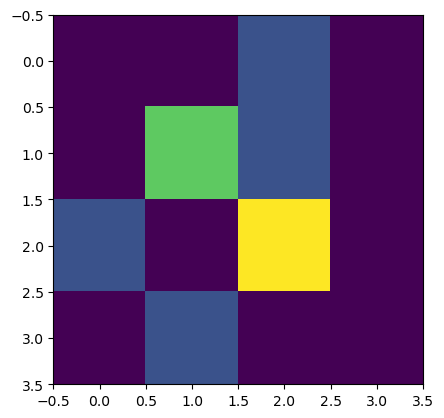

For the 11th step
Action: 3
Reward: -1
Done: False


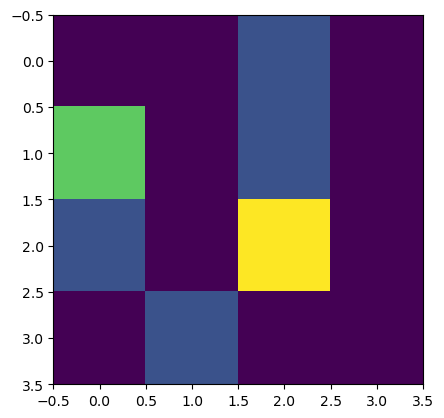

For the 12th step
Action: 0
Reward: -1
Done: False


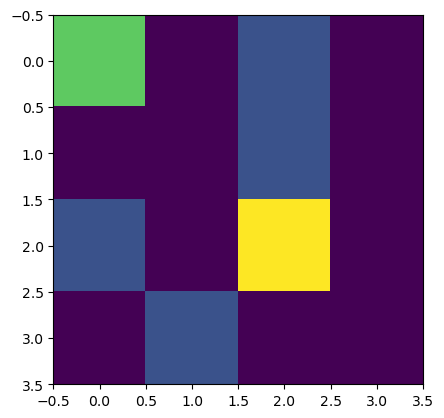

For the 13th step
Action: 2
Reward: -1
Done: False


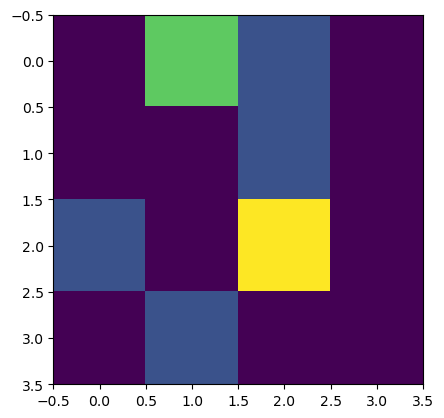

For the 14th step
Action: 1
Reward: -1
Done: False


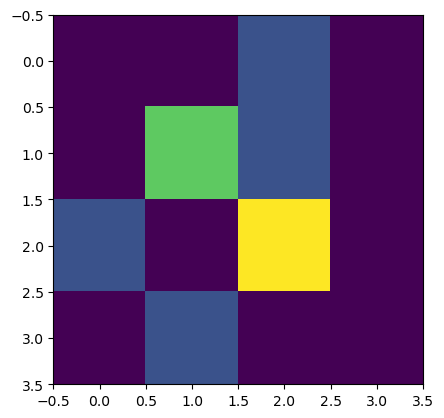

For the 15th step
Action: 0
Reward: -1
Done: False


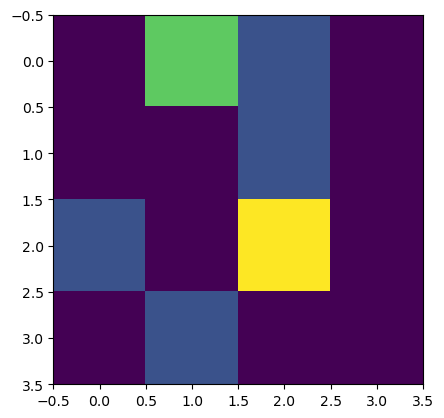

For the 16th step
Action: 0
Reward: -1
Done: False


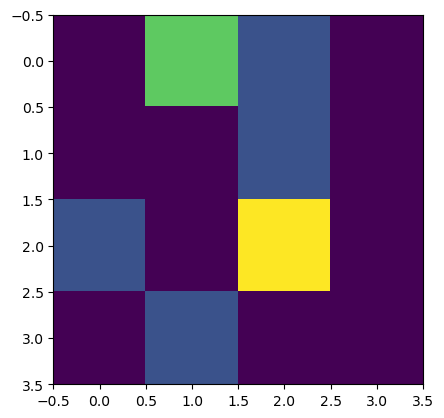

For the 17th step
Action: 2
Reward: -1
Done: False


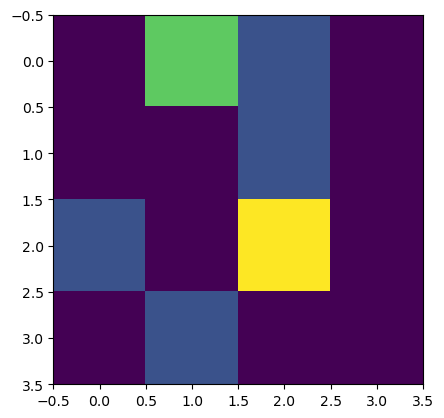

For the 18th step
Action: 1
Reward: -1
Done: False


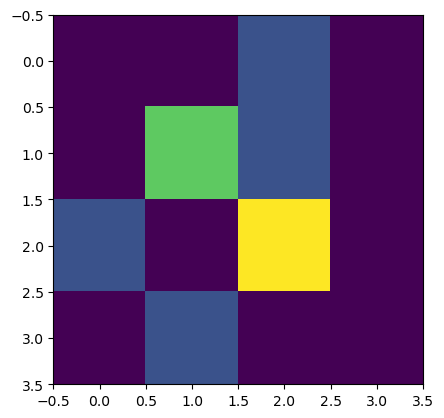

For the 19th step
Action: 1
Reward: -1
Done: False


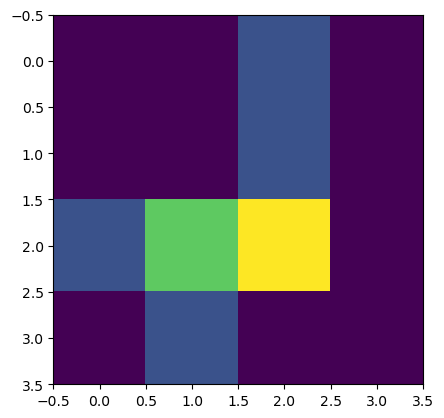

For the 20th step
Action: 3
Reward: -1
Done: False


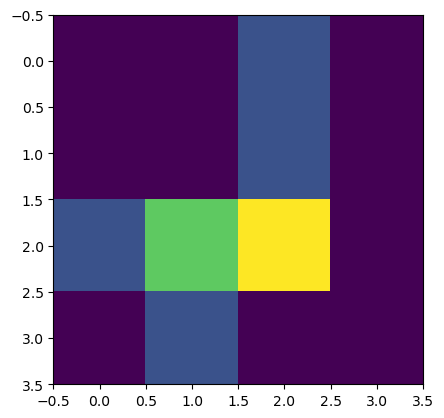

For the 21th step
Action: 1
Reward: -1
Done: False


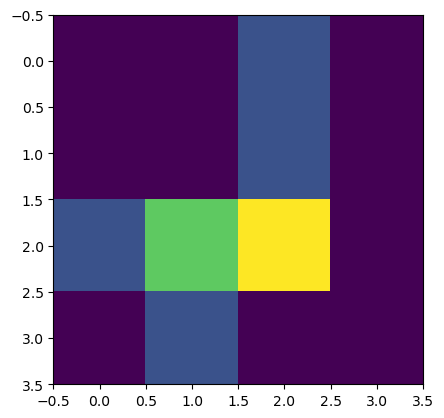

For the 22th step
Action: 0
Reward: -1
Done: False


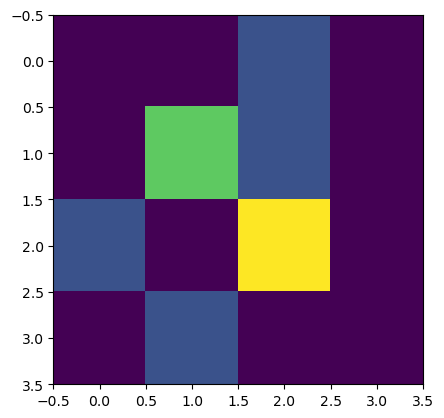

For the 23th step
Action: 2
Reward: -1
Done: False


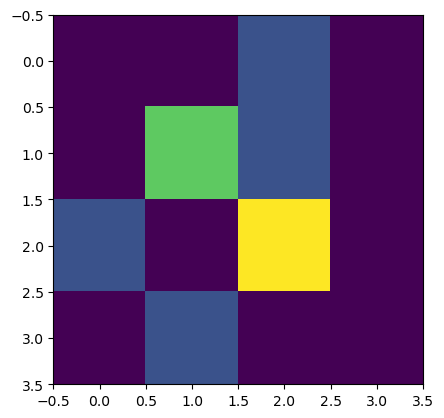

For the 24th step
Action: 0
Reward: -1
Done: False


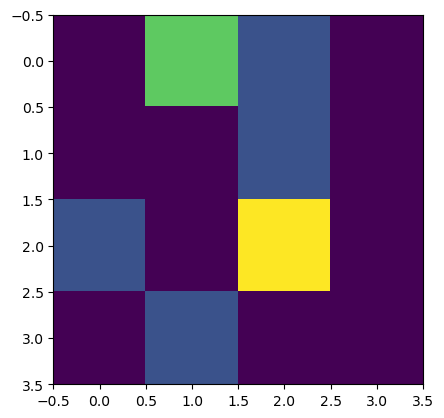

For the 25th step
Action: 0
Reward: -1
Done: False


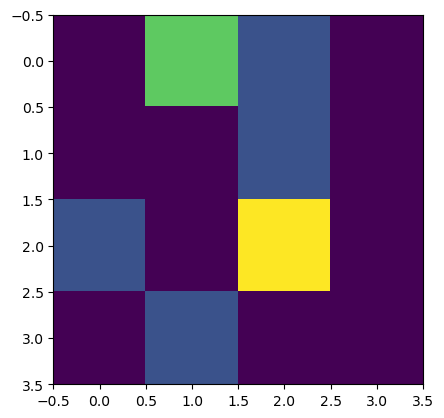

For the 26th step
Action: 3
Reward: -1
Done: False


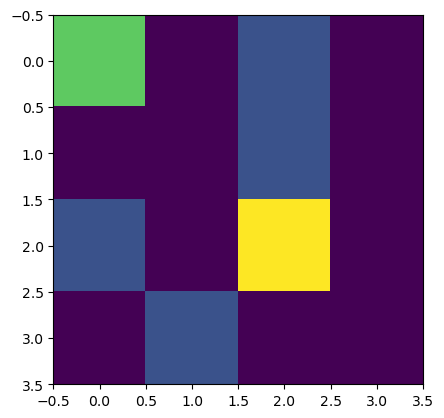

For the 27th step
Action: 3
Reward: -1
Done: False


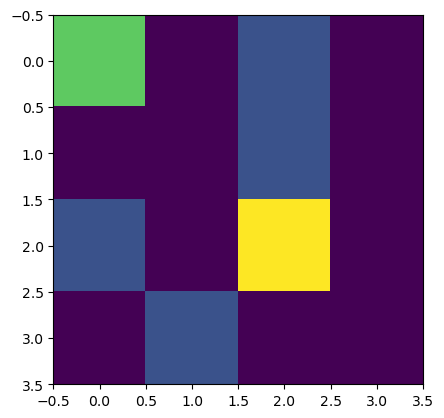

For the 28th step
Action: 0
Reward: -1
Done: False


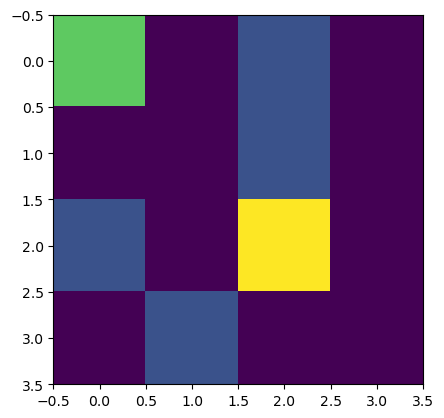

For the 29th step
Action: 2
Reward: -1
Done: False


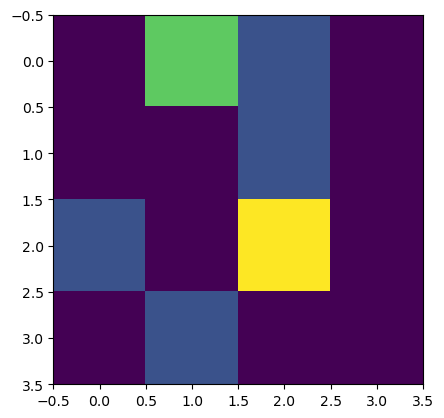

For the 30th step
Action: 2
Reward: -1
Done: False


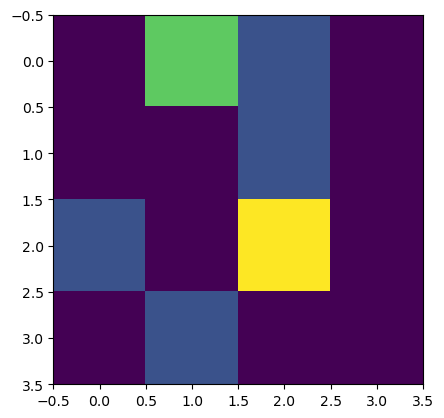

For the 31th step
Action: 1
Reward: -1
Done: False


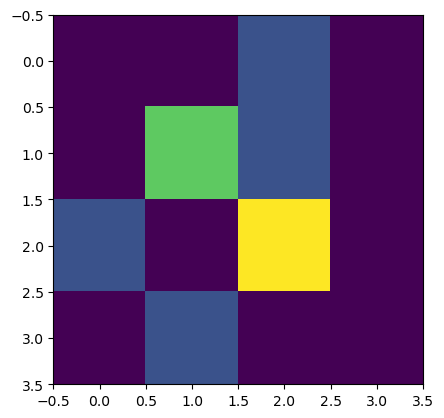

For the 32th step
Action: 2
Reward: -1
Done: False


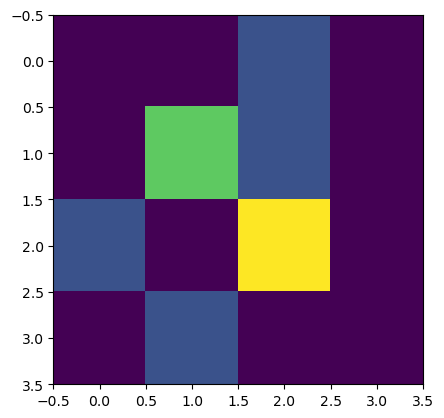

For the 33th step
Action: 1
Reward: -1
Done: False


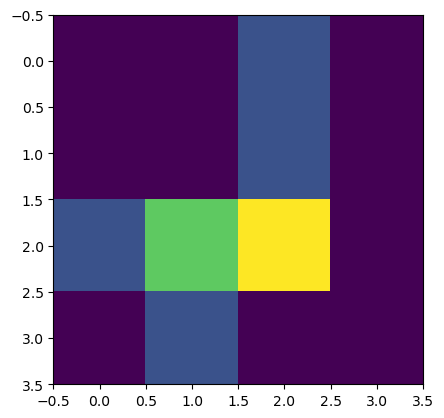

For the 34th step
Action: 2
Reward: -1
Done: False


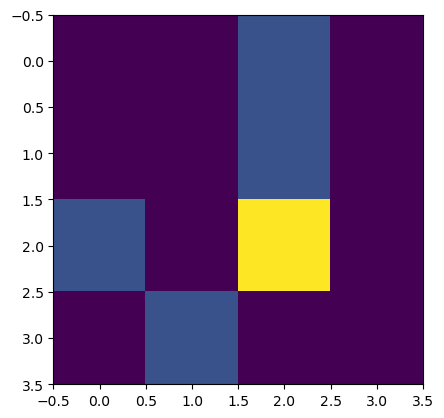

For the 35th step
Action: 2
Reward: 10
Done: True


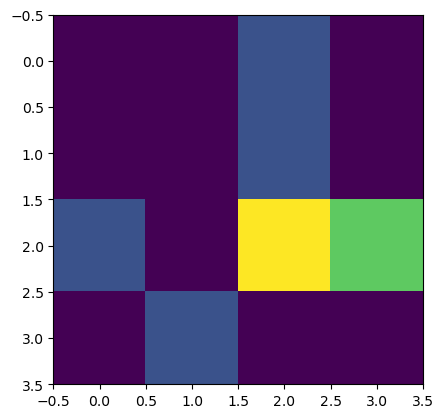

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

class SARSAAgent():
    def __init__(self, action_space, observation_space, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.Q = np.zeros((len(observation_space), len(action_space)))  # Q-table

    def act(self, observation, reward, done):
        if random.uniform(0, 1) < self.epsilon:
            # choose a random action
            return random.choice(self.action_space)
        else:
            # choose the action with the highest Q-value
            state_idx = np.where((self.observation_space == observation).all(axis=1))[0][0]
            q_values = self.Q[state_idx, :]
            max_q_value = np.max(q_values)
            max_action_indices = np.where(q_values == max_q_value)[0]
            return random.choice(max_action_indices)

    def learn(self, state, action, reward, next_state, next_action, done):
        state_idx = np.where((self.observation_space == state).all(axis=1))[0][0]
        next_state_idx = np.where((self.observation_space == next_state).all(axis=1))[0][0]
        q_value = self.Q[state_idx, action]
        next_q_value = self.Q[next_state_idx, next_action]
        td_target = reward + self.gamma * next_q_value * (1 - done)
        td_error = td_target - q_value
        self.Q[state_idx, action] += self.alpha * td_error

    def reset(self):
        pass


env = TreasureHuntEnv()
agent = SARSAAgent(env.action_space, env.observation_space)

obs = env.reset()
done = False
reward = 0  # initialize reward to 0
count = 1
while not done:
    action = agent.act(obs, reward, done)
    next_obs, reward, done, _ = env.step(action)
    next_action = agent.act(next_obs, reward, done)
    agent.learn(obs, action, reward, next_obs, next_action, done)
    obs = next_obs
    print(f"For the {count}th step")
    count += 1
    print('Action:', action)
    print('Reward:', reward)
    print('Done:', done)
    env.render()


# Plotting and Optimizing

[I 2023-04-27 21:25:25,342] A new study created in memory with name: no-name-3a9a1313-a7dd-42a2-b6c7-517f8568fd97
/var/folders/q4/72ybtynd5sjf5ppl_5vpsw080000gn/T/ipykernel_9669/279927952.py:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon=trial.suggest_uniform("epsilon", 0.01, 1.0))
[I 2023-04-27 21:25:25,582] Trial 0 finished with value: 14.154 and parameters: {'alpha': 0.0021351488475168305, 'gamma': 0.75, 'epsilon': 0.7948543891730393, 'num_episodes': 500, 'max_timesteps': 200}. Best is trial 0 with value: 14.154.
[I 2023-04-27 21:25:25,784] Trial 1 finished with value: 1.188 and parameters: {'alpha': 0.004162031264280722, 'gamma': 0.75, 'epsilon': 0.09048337617288107, 'num_episodes': 500, 'max_timesteps': 100}. Best is trial 1 with value: 1.188.
[I 2023-04-27 21:25:26,026] Trial 2 finished with value: 0.

Number of finished trials:  50
Best trial:
  Value:  -5.9205
  Params: 
    alpha: 0.23595879930179361
    gamma: 0.9
    epsilon: 0.01136246249957887
    num_episodes: 2000
    max_timesteps: 200
Training complete!
Avg. reward over 200 episodes: 5.59
Standard deviation of rewards: 2.6498867900346235
Min reward: -20
Max reward: 6


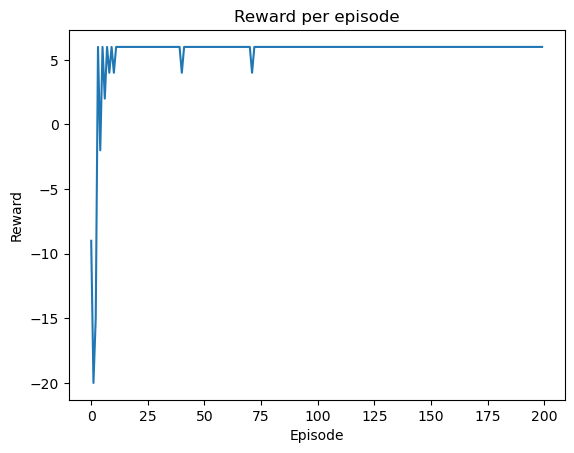

In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import optuna

class SARSAAgent():
    def __init__(self, action_space, observation_space, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # learning rate
        self.gamma = gamma  # discount factor
        self.epsilon = epsilon  # exploration rate
        self.Q = np.zeros((len(observation_space), len(action_space)))  # Q-table

    def act(self, observation, reward, done):
        if random.uniform(0, 1) < self.epsilon:
            # choose a random action
            return random.choice(self.action_space)
        else:
            # choose the action with the highest Q-value
            state_idx = np.where((self.observation_space == observation).all(axis=1))[0][0]
            q_values = self.Q[state_idx, :]
            max_q_value = np.max(q_values)
            max_action_indices = np.where(q_values == max_q_value)[0]
            return random.choice(max_action_indices)

    def learn(self, state, action, reward, next_state, next_action, done):
        state_idx = np.where((self.observation_space == state).all(axis=1))[0][0]
        next_state_idx = np.where((self.observation_space == next_state).all(axis=1))[0][0]
        q_value = self.Q[state_idx, action]
        next_q_value = self.Q[next_state_idx, next_action]
        td_target = reward + self.gamma * next_q_value * (1 - done)
        td_error = td_target - q_value
        self.Q[state_idx, action] += self.alpha * td_error

    def reset(self):
        pass


def objective(trial):
    env = TreasureHuntEnv()
    agent = SARSAAgent(env.action_space, env.observation_space,
                       alpha=trial.suggest_float("alpha", 0.001, 0.5, log=True),
                       gamma=trial.suggest_categorical("gamma", [0.5, 0.75, 0.9]),
                       epsilon=trial.suggest_uniform("epsilon", 0.01, 1.0))

    num_episodes = trial.suggest_categorical("num_episodes", [500, 1000, 2000])
    max_timesteps = trial.suggest_categorical("max_timesteps", [100, 200, 500])

    rewards = []
    for i in range(num_episodes):
        obs = env.reset()
        done = False
        episode_reward = 0
        for j in range(max_timesteps):
            action = agent.act(obs, episode_reward, done)
            next_obs, reward, done, _ = env.step(action)
            next_action = agent.act(next_obs, reward, done)
            agent.learn(obs, action, reward, next_obs, next_action, done)
            obs = next_obs
            episode_reward += reward
            if done:
                break
        rewards.append(episode_reward)
    return -np.mean(rewards)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Train the agent with the best hyperparameters
env = TreasureHuntEnv()
best_alpha = study.best_params["alpha"]
best_gamma = study.best_params["gamma"]
best_epsilon = study.best_params["epsilon"]

agent = SARSAAgent(env.action_space, env.observation_space, alpha=best_alpha, gamma=best_gamma, epsilon=best_epsilon)

num_episodes = 200
max_timesteps = 50

rewards = []
for i in range(num_episodes):
    obs = env.reset()
    done = False
    episode_reward = 0
    for j in range(max_timesteps):
        action = agent.act(obs, episode_reward, done)
        next_obs, reward, done, _ = env.step(action)
        next_action = agent.act(next_obs, reward, done)
        agent.learn(obs, action, reward, next_obs, next_action, done)
        obs = next_obs
        episode_reward += reward
        if done:
            break
    rewards.append(episode_reward)

# Print results
print("Training complete!")
print(f"Avg. reward over {num_episodes} episodes: {np.mean(rewards)}")
print(f"Standard deviation of rewards: {np.std(rewards)}")
print(f"Min reward: {np.min(rewards)}")
print(f"Max reward: {np.max(rewards)}")

# Plot results
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward per episode")
plt.show()



This output is from a reinforcement learning algorithm that was run with hyperparameter tuning. Here's how to interpret the output:

* "Number of finished trials: 50" indicates that the algorithm was run 50 times, each time with a different combination of hyperparameters.

* "Best trial:" shows the hyperparameters that resulted in the best performance. In this case, the best trial had a value of -10.0, which is the best average reward achieved over all the episodes. The hyperparameters used for this trial were:
    - alpha: 0.00439811882550285
    - gamma: 0.5
    - epsilon: 0.816838344389104
    - num_episodes: 2000
    - max_timesteps: 200

* "Training complete!" indicates that the algorithm has finished training with the best set of hyperparameters.

* "Avg. reward over 2000 episodes: 10.0" indicates the average reward obtained over 2000 episodes of training with the best set of hyperparameters.

* "Standard deviation of rewards: 0.0" shows the deviation of rewards from the mean reward. In this case, since the standard deviation is 0, all rewards are the same, which indicates that the algorithm is performing consistently.

* "Min reward: 10" and "Max reward: 10" indicate the lowest and highest reward achieved respectively. In this case, since the standard deviation is 0, the minimum and maximum reward are also equal to the average reward.
